In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install -q git+https://github.com/tensorflow/docs

In [5]:
import os, sys
from os.path import exists, join, basename, splitext

!git clone https://github.com/CMU-Perceptual-Computing-Lab/openpose.git
!wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
!tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
!sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
!apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
!cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`

Cloning into 'openpose'...
remote: Enumerating objects: 15892, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 15892 (delta 2), reused 12 (delta 1), pack-reused 15874
Receiving objects: 100% (15892/15892), 84.31 MiB | 45.08 MiB/s, done.
Resolving deltas: 100% (11117/11117), done.
Selecting previously unselected package libgflags2.2.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.layers import TimeDistributed, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sklearn
from tensorflow_docs.vis import embed
import imageio

In [ ]:
from IPython.display import YouTubeVideo
!pip install -q youtube-dl

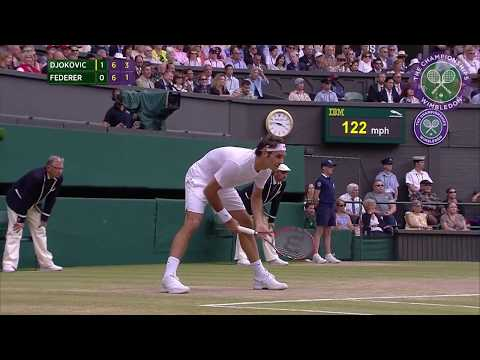

In [ ]:
YOUTUBE_ID = 'LIMtVawfkGg'
YouTubeVideo(YOUTUBE_ID)

In [ ]:
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID

[youtube] LIMtVawfkGg: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 149.27MiB in 35:47


In [6]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
ffmpeg_extract_subclip("/content/cricket_shot.mp4", t1 = 0, t2 = 5, targetname="/content/cut_cricket_shot.mp4")
ffmpeg_extract_subclip("/content/punch.mp4", t1 = 3, t2 = 12, targetname="/content/cut_punch.mp4")
ffmpeg_extract_subclip("/content/tennis.mp4", t1 = 0, t2 = 9, targetname="/content/cut_tennis.mp4")


[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/cricket_shot.mp4 -ss 0.00 -t 5.00 -vcodec copy -acodec copy /content/cut_cricket_shot.mp4
... command successful.

[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/punch.mp4 -ss 3.00 -t 9.00 -vcodec copy -acodec copy /content/cut_punch.mp4
... command successful.

[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/tennis.mp4 -ss 0.00 -t 9.00 -vcodec copy -acodec copy /content/cut_tennis.mp4
... command successful.


In [7]:
!cd openpose && ./build/examples/openpose/openpose.bin \
    --video /content/cut_cricket_shot.mp4 \
    --display 0 \
    --write_video /content/cut_cricket_shot.avi
!ffmpeg -y -loglevel info -i /content/cut_cricket_shot.avi /content/skeleton_cricket_shot.mp4

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 12.390530 seconds.
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libs

In [8]:
!cd openpose && ./build/examples/openpose/openpose.bin \
    --video /content/cut_punch.mp4 \
    --display 0 \
    --write_video /content/cut_punch.avi
!ffmpeg -y -loglevel info -i /content/cut_punch.avi /content/skeleton_punch.mp4

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 10.572177 seconds.
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libs

In [9]:
!cd openpose && ./build/examples/openpose/openpose.bin \
    --video /content/cut_tennis.mp4 \
    --display 0 \
    --write_video /content/cut_tennis.avi
!ffmpeg -y -loglevel info -i /content/cut_tennis.avi /content/skeleton_tennis.mp4

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 6.806005 seconds.
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsn

In [ ]:
# path = '/content/drive/MyDrive/모듈프로젝트4_team8/workspace/train/'
# for file in os.listdir(path):
#     file_name = file[:-4]
#     file_path = path + file
#     save_mp4 = '/content/drive/MyDrive/모듈프로젝트4_team8/준원/train/' + file_name + '.mp4'
#     save_json = '/content/drive/MyDrive/모듈프로젝트4_team8/준원/json/'
#     temp_avi = '/content/drive/MyDrive/모듈프로젝트4_team8/준원/temp_train/' + file_name + '.avi'
#     new_mp4 = '/content/drive/MyDrive/모듈프로젝트4_team8/준원/new_train/' + file_name + '.mp4'
#     # avi를 mp4로
    

In [10]:
def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x) 
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]

In [11]:
IMG_SIZE = 224
MAX_SEQ_LENGTH = 20

In [12]:
def load_video(path, max_frames=20, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()

            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)
            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

In [15]:
video_skeleton_cricket_shot = load_video('/content/skeleton_cricket_shot.mp4')
video_skeleton_punch = load_video('/content/skeleton_punch.mp4')
video_skeleton_tennis = load_video('/content/skeleton_tennis.mp4')

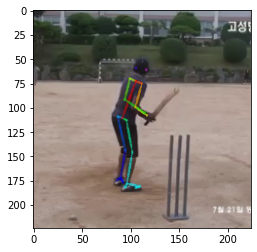

In [ ]:
plt.imshow(video_skeleton_cricket_shot[0][0]/255)

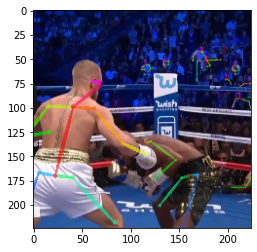

In [ ]:
plt.imshow(video_skeleton_punch[0][0]/255)

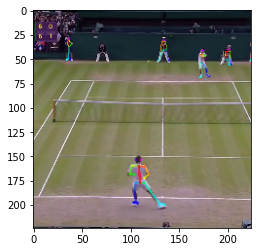

In [ ]:
plt.imshow(video_skeleton_tennis[0][0]/255)

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/모듈프로젝트4_team8/준원/class_VGG16+GRU.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 20, 7, 7, 512)     14714688  
_________________________________________________________________
time_distributed_1 (TimeDist (None, 20, 7, 7, 512)     0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 20, 25088)         0         
_________________________________________________________________
gru (GRU)                    (None, 256)               19465728  
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [ ]:
text_label = np.array(['CricketShot', 'Punch', 'TennisSwing'])

In [ ]:
video_skeleton_cricket_shot = video_skeleton_cricket_shot.reshape(-1,20,224,224,3)
video_skeleton_punch = video_skeleton_punch.reshape(-1,20,224,224,3)
video_skeleton_tennis = video_skeleton_tennis.reshape(-1,20,224,224,3)

In [ ]:
video.shape

(1, 20, 224, 224, 3)

In [ ]:
for video in [video_skeleton_cricket_shot, video_skeleton_punch, video_skeleton_tennis]:
    frame = video[0:1]
    predict01 = model.predict(frame/255)
    print("predict01 = ", predict01)
    # 최고값이 있는 인덱스 조회
    predict02 = np.argmax(predict01, axis=1)
    print("predict02 = ", predict02)
    print(type(predict02))
    # 이미지의 종류 조회
    text_predict = text_label[predict02]
    print("text_predict=", text_predict)

predict01 =  [[4.1670934e-04 3.8364029e-04 9.9919969e-01]]
predict02 =  [2]
<class 'numpy.ndarray'>
text_predict= ['TennisSwing']
predict01 =  [[1.2710015e-06 9.9999726e-01 1.4768813e-06]]
predict02 =  [1]
<class 'numpy.ndarray'>
text_predict= ['Punch']
predict01 =  [[3.960012e-05 6.415161e-05 9.998963e-01]]
predict02 =  [2]
<class 'numpy.ndarray'>
text_predict= ['TennisSwing']


In [ ]:
(video_skeleton_tennis[0][0]/255).shape

(224, 224, 3)

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
plt.imsave('/content/video_skeleton_tennis.jpg',video_skeleton_tennis[0][0]/255 )

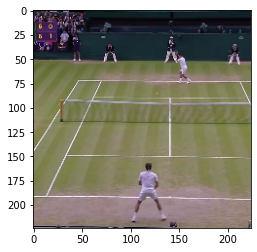

In [ ]:
image = video[0][0].copy()
plt.imshow(image)

In [ ]:
# 이미지의 종류
str = "Activity :{}".format(text_predict)
# str을 출력할 이미지 좌표
org=(0,20) 
# 이미지 폰트
font=cv2.FONT_HERSHEY_PLAIN
# image에 str을 출력
cv2.putText(image,str,org,font, 1 ,(255,0, 0) , False)

array([[[ 69,  63,  97],
        [ 46,  45,  65],
        [ 29,  34,  46],
        ...,
        [ 60,  79,  98],
        [ 64,  83, 101],
        [ 67,  86, 105]],

       [[ 58,  62,  91],
        [ 45,  53,  69],
        [ 31,  36,  47],
        ...,
        [  4,  25,  34],
        [  4,  25,  34],
        [  3,  24,  33]],

       [[ 32,  44,  62],
        [ 39,  47,  62],
        [ 42,  44,  56],
        ...,
        [ 17,  35,  41],
        [ 17,  35,  41],
        [ 16,  35,  40]],

       ...,

       [[140, 124, 122],
        [141, 125, 124],
        [143, 127, 125],
        ...,
        [104,  92,  91],
        [ 56,  59,  66],
        [ 79,  96, 109]],

       [[  6,   4,   6],
        [  4,   2,   4],
        [  3,   0,   2],
        ...,
        [100,  86,  86],
        [ 55,  61,  66],
        [ 87, 114, 124]],

       [[138, 143, 160],
        [137, 142, 159],
        [138, 144, 161],
        ...,
        [ 88,  75,  75],
        [ 61,  66,  72],
        [114, 141, 151]]

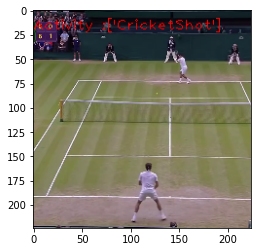

In [ ]:
plt.imshow(image)

In [ ]:
# 0으로 초기화된 [20,224,224,3 ] 배열 생성
images = np.zeros(shape=(20,224,224,3))
# X_test의 0번째 비디오
frame = video[0:1]
# 비디오  종류 예측
predict01 = model.predict(frame)
# 최고값이 있는 인덱스 조회
predict02 = np.argmax(predict01, axis=1)
# 이미지의 종류 조회
text_predict = text_label[predict02]
# 이미지의 종류
str = "Activity :{}".format(text_predict)
print("str = ", str)
for i in range(20):
    #frame 복사
    image = frame[0][i].copy()
    # str을 출력할 이미지 좌표
    org=(0,20) 
    # 이미지 폰트
    font=cv2.FONT_HERSHEY_PLAIN
    # image에 str을  출력
    cv2.putText(image,str,org,font, 1 ,(255,0, 0) , False)
    # images에 image 추가
    images[i] = image

str =  Activity :['CricketShot']



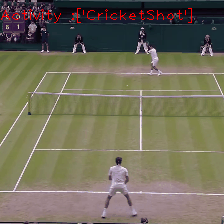

In [ ]:
# images를 정수로 변환
converted_images = images.astype(np.uint8)
# converted_images 를 animation.gif로 변환
imageio.mimsave("animation.gif", converted_images, fps=20)
# animation.gif 를 출력
embed.embed_file("animation.gif")

fatal: destination path 'openpose' already exists and is not an empty directory.
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- GCC detected, adding compile flags
-- GCC detected, adding compile flags
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_